<a href="https://colab.research.google.com/github/Anamika1621/Personal_Expense-Tracker/blob/main/personal_expenses_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library import
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
#loading the data
try:
    df = pd.read_csv("expenses.csv")
except FileNotFoundError:
    df = pd.DataFrame(columns=["Date", "Category", "Amount", "Description"])

In [ ]:
amount_input = widgets.FloatText(description="Amount:")
category_input = widgets.Dropdown(
    options=["Food", "Transport", "Shopping", "Bills", "Entertainment", "Other"],
    description="Category:"
)
description_input = widgets.Text(description="Note:")
add_button = widgets.Button(description="Add Expense", button_style="success")
show_button = widgets.Button(description="Show Summary", button_style="info")
output = widgets.Output()

In [ ]:
def add_expense(b):
    global df
    new_entry = {
        "Date": datetime.today().strftime("%Y-%m-%d"),
        "Category": category_input.value,
        "Amount": amount_input.value,
        "Description": description_input.value
    }
    df = pd.concat([df, pd.DataFrame([new_entry])], ignore_index=True)
    df.to_csv("expenses.csv", index=False)

    with output:
        clear_output()
        print("✅ Expense Added!")
        display(df.tail(5))  # Show last 5 entries

def show_summary(b=None):
    with output:
        clear_output()
        if df.empty:
            print("⚠️ No expenses recorded yet!")
            return

        summary = df.groupby("Category")["Amount"].sum()
        print("\n--- Expense Summary ---")
        display(summary)

        # Pie chart
        summary.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
        plt.title("Expenses by Category")
        plt.ylabel("")
        plt.show()

        # Bar chart
        df.groupby("Date")["Amount"].sum().plot(kind="bar", figsize=(8,5))
        plt.title("Daily Expenses")
        plt.xlabel("Date")
        plt.ylabel("Total Amount")
        plt.show()

In [ ]:
add_button.on_click(add_expense)
show_button.on_click(show_summary)
display(amount_input, category_input, description_input, add_button, show_button, output)

✅ Expense Added!


,Date,Category,Amount,Description
1,2025-09-18,Transport,100,Cab fare
2,2025-09-18,Shopping,500,Clothes
3,2025-09-18,Transport,2.0,abc
4,2025-09-18,Transport,2.0,abc
5,2025-09-18,Transport,250.0,abc



--- Expense Summary ---


,Amount
Category,
Food,250
Shopping,500
Transport,354.0


/tmp/ipython-input-1555524508.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  summary.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))


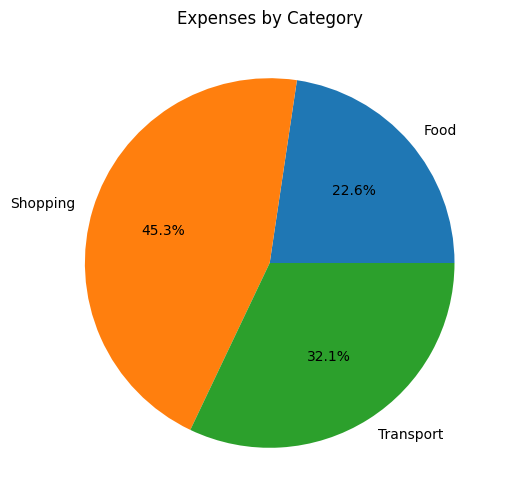

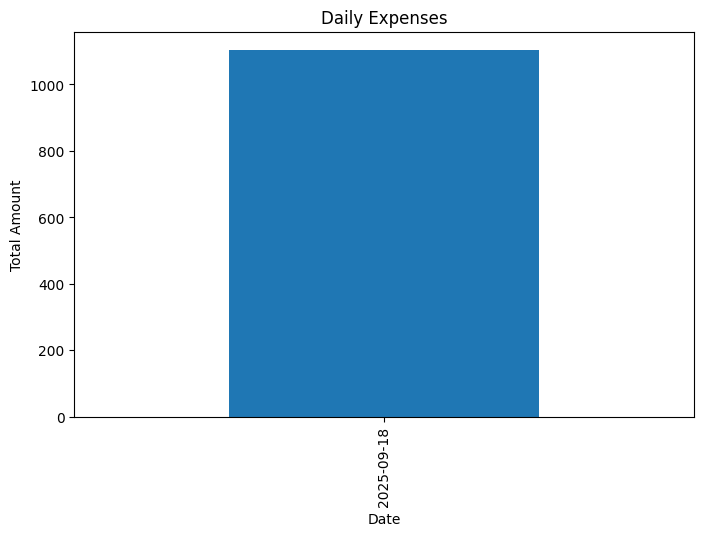

In [ ]:
show_summary()